In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('alzheimers_cleaned.csv')
print(data.head())

# Summary statistics for numerical columns
numerical_summary = data.describe()

# Summary for categorical columns
categorical_summary = data.describe(include='object')

# Display results
print("Numerical Data Summary:\n", numerical_summary)
print("\nCategorical Data Summary:\n", categorical_summary)

        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High      

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # Instantiate LabelEncoder
for col in ['Country', 'Gender', 'Physical Activity Level', 'Smoking Status',
            'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
            'Family History of Alzheimers','Depression Level','Sleep Quality',
            'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
            'Marital Status', 'Genetic Risk Factor (APOE-4 allele)','Social Engagement Level', 'Income Level',
            'Stress Levels', 'Urban vs Rural Living', 'Alzheimers Diagnosis']:
    if col in data.columns:  # Check if column exists before encoding
        data[col] = le.fit_transform(data[col])
    else:
        print(f"Column '{col}' not found in dataset.")

In [3]:
# Define features and target
X = data.drop(columns='Alzheimers Diagnosis')
y = data['Alzheimers Diagnosis']

In [4]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Age', 'Family History of Alzheimers', 'Genetic Risk Factor (APOE-4 allele)', 'Income Level', 'Stress Levels']


In [5]:
from sklearn.model_selection import train_test_split
X=data.drop (columns='Alzheimers Diagnosis')
y=data['Alzheimers Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
model= LogisticRegression (max_iter=1000, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7124523221898138

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
model= SVC(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.7091317029391968

In [9]:
# Define models

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

In [10]:
# Train and evaluate models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7125
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     13065
           1       0.67      0.60      0.63      9220

    accuracy                           0.71     22285
   macro avg       0.70      0.70      0.70     22285
weighted avg       0.71      0.71      0.71     22285


SVM Accuracy: 0.7091
              precision    recall  f1-score   support

           0       0.74      0.78      0.76     13065
           1       0.66      0.61      0.63      9220

    accuracy                           0.71     22285
   macro avg       0.70      0.69      0.70     22285
weighted avg       0.71      0.71      0.71     22285


Random Forest Accuracy: 0.7181
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     13065
           1       0.67      0.64      0.65      9220

    accuracy                           0.72     22285
   macro avg       0.71      0.71   

In [11]:
accuracy_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7125
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     13065
           1       0.67      0.60      0.63      9220

    accuracy                           0.71     22285
   macro avg       0.70      0.70      0.70     22285
weighted avg       0.71      0.71      0.71     22285


SVM Accuracy: 0.7091
              precision    recall  f1-score   support

           0       0.74      0.78      0.76     13065
           1       0.66      0.61      0.63      9220

    accuracy                           0.71     22285
   macro avg       0.70      0.69      0.70     22285
weighted avg       0.71      0.71      0.71     22285


Random Forest Accuracy: 0.7181
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     13065
           1       0.67      0.64      0.65      9220

    accuracy                           0.72     22285
   macro avg       0.71      0.71   

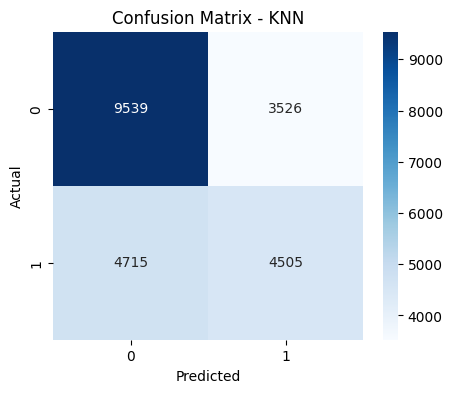

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix plot
plt.figure(figsize=(5, 4))  
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()